<a href="https://colab.research.google.com/github/jagath215/MathProject/blob/main/LoanPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Loan Approval Prediction

Importing packages

In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [42]:
data = pd.read_csv("Datasets.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [43]:
data.shape

(614, 13)

In [44]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

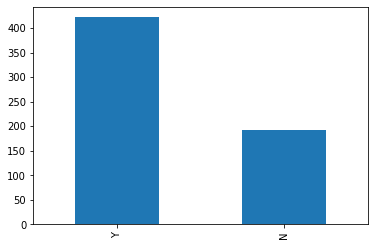

In [45]:
data['Loan_Status'].value_counts().plot.bar()

In [46]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [47]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [48]:
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [49]:
data['LoanAmount'] = data['LoanAmount'].fillna(data['LoanAmount'].mean())
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].fillna(data['Loan_Amount_Term'].mean())
data['Credit_History'] = data['Credit_History'].fillna(data['Credit_History'].mean())

In [50]:
data['Gender'] = data["Gender"].fillna(data['Gender'].mode()[0])
data['Married'] = data["Married"].fillna(data['Married'].mode()[0])
data['Dependents'] = data["Dependents"].fillna(data['Dependents'].mode()[0])
data['Self_Employed'] = data["Self_Employed"].fillna(data['Self_Employed'].mode()[0])

In [51]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

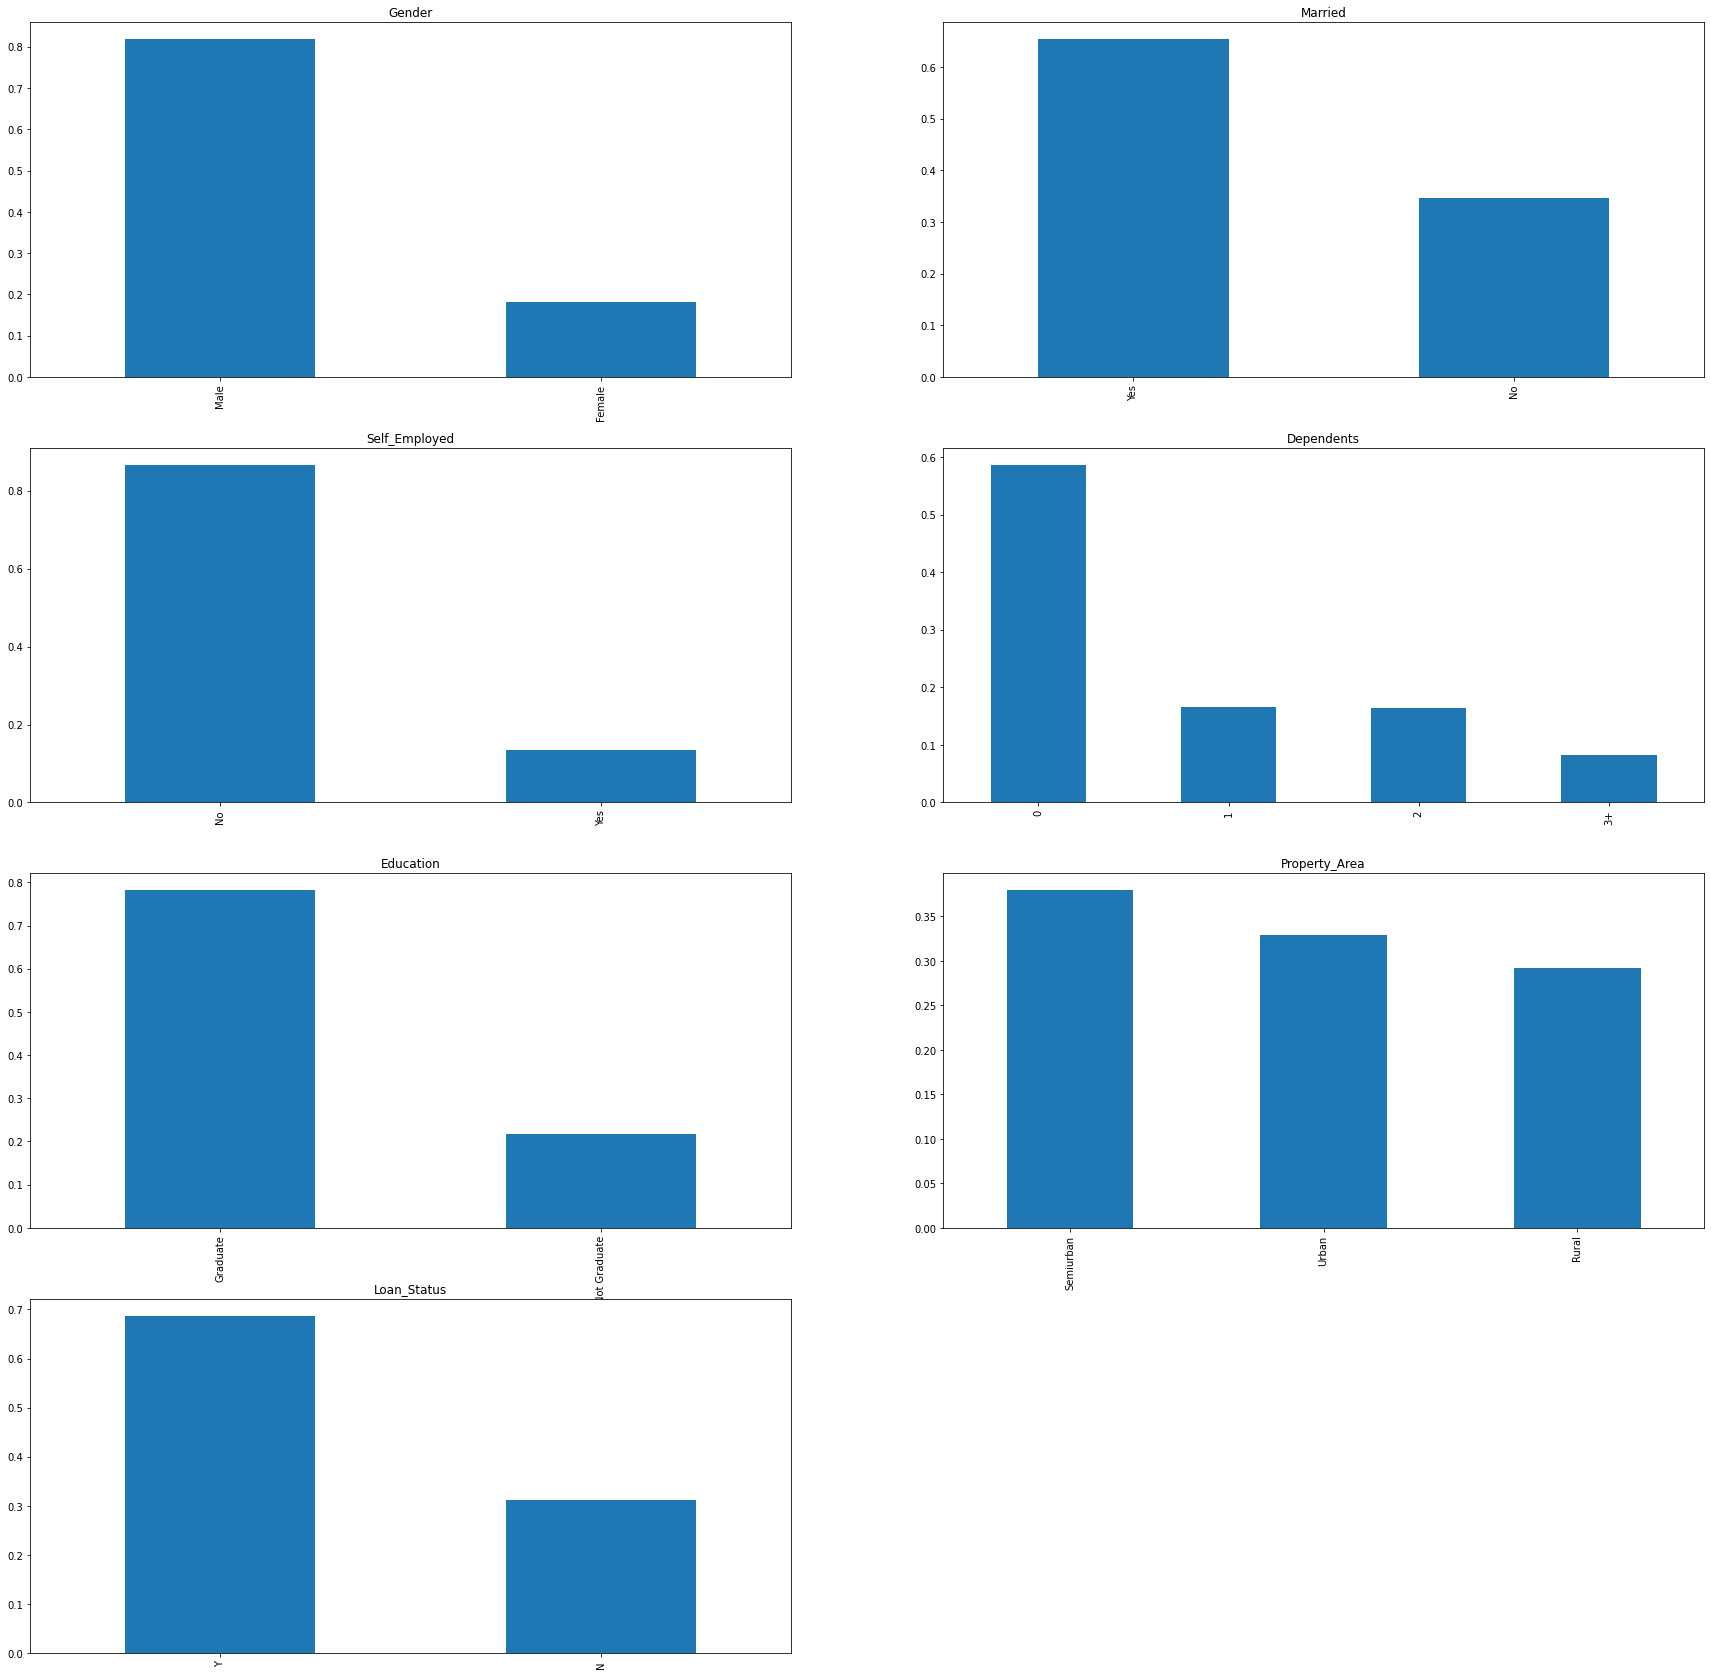

In [52]:
plt.figure(1)
plt.subplot(421)
data['Gender'].value_counts(normalize=True).plot.bar(figsize=(30,30), title='Gender')
plt.subplot(422) 
data['Married'].value_counts(normalize=True).plot.bar(title= 'Married') 
plt.subplot(423) 
data['Self_Employed'].value_counts(normalize=True).plot.bar(title= 'Self_Employed') 
plt.subplot(424) 
data['Dependents'].value_counts(normalize=True).plot.bar(title= 'Dependents')
plt.subplot(425) 
data['Education'].value_counts(normalize=True).plot.bar(title= 'Education') 
plt.subplot(426) 
data['Property_Area'].value_counts(normalize=True).plot.bar(title= 'Property_Area')
plt.subplot(427) 
data['Loan_Status'].value_counts(normalize=True).plot.bar(title= 'Loan_Status')
plt.show()

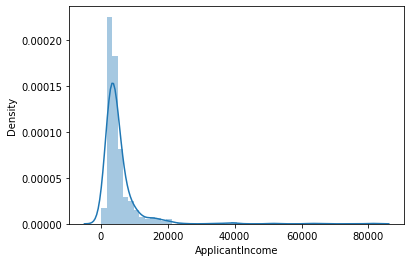

In [55]:
sns.distplot(data["ApplicantIncome"])


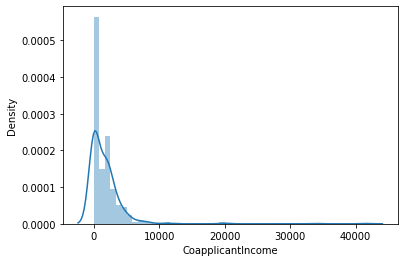

In [56]:
sns.distplot(data["CoapplicantIncome"])


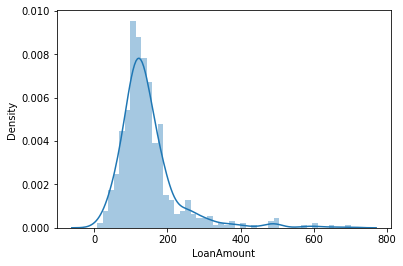

In [57]:
sns.distplot(data["LoanAmount"])

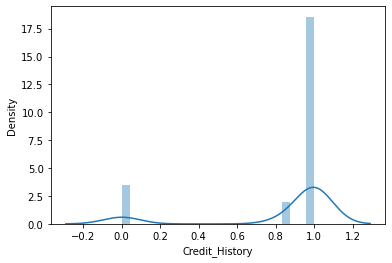

In [58]:
sns.distplot(data['Credit_History'])

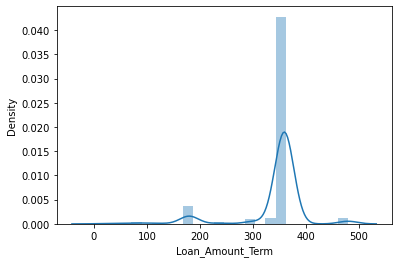

In [59]:
sns.distplot(data['Loan_Amount_Term'])

In [62]:
data['Total_Income'] = data['ApplicantIncome'] + data['CoapplicantIncome']
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,Total_Income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.993232,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.859812,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.204693,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.795791,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.955827,6000.0


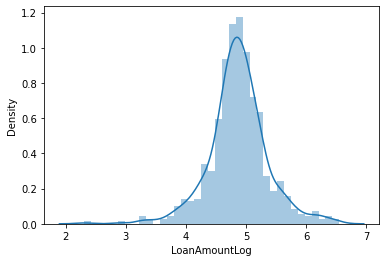

In [63]:
data['LoanAmountLog'] = np.log(data['LoanAmount']+1)
sns.distplot(data["LoanAmountLog"])

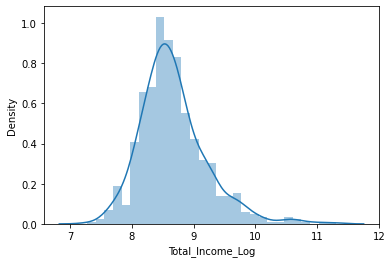

In [66]:
data['Total_Income_Log'] = np.log(data['Total_Income']+1)
sns.distplot(data["Total_Income_Log"])

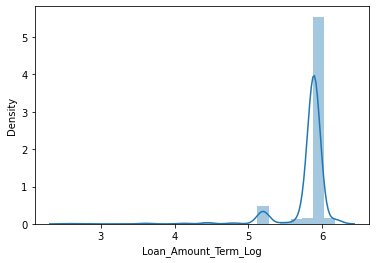

In [67]:
data['Loan_Amount_Term_Log'] = np.log(data['Loan_Amount_Term']+1)
sns.distplot(data["Loan_Amount_Term_Log"])

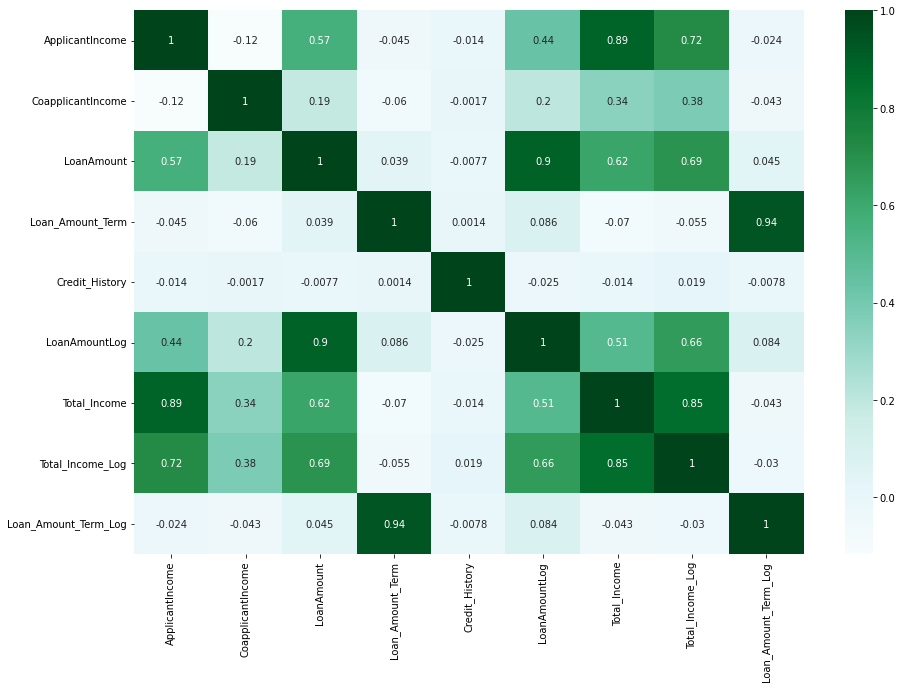

In [68]:
corr = data.corr()
plt.figure(figsize=(15,10))
sns.heatmap(corr, annot = True, cmap="BuGn")

In [69]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmountLog,Total_Income,Total_Income_Log,Loan_Amount_Term_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.993232,5849.0,8.674197,5.888878
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.859812,6091.0,8.714732,5.888878
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.204693,3000.0,8.006701,5.888878
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.795791,4941.0,8.505525,5.888878
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.955827,6000.0,8.699681,5.888878


In [70]:
cols = ['ApplicantIncome', 'CoapplicantIncome', "LoanAmount", "Loan_Amount_Term", "Total_Income", 'Loan_ID']
data = data.drop(columns=cols, axis=1)
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmountLog,Total_Income_Log,Loan_Amount_Term_Log
0,Male,No,0,Graduate,No,1.0,Urban,Y,4.993232,8.674197,5.888878
1,Male,Yes,1,Graduate,No,1.0,Rural,N,4.859812,8.714732,5.888878
2,Male,Yes,0,Graduate,Yes,1.0,Urban,Y,4.204693,8.006701,5.888878
3,Male,Yes,0,Not Graduate,No,1.0,Urban,Y,4.795791,8.505525,5.888878
4,Male,No,0,Graduate,No,1.0,Urban,Y,4.955827,8.699681,5.888878


In [72]:
# label encoder
from sklearn.preprocessing import LabelEncoder
cols = ['Gender',"Married","Education",'Self_Employed',"Property_Area","Loan_Status","Dependents"]
le = LabelEncoder()
for col in cols:
    data[col] = le.fit_transform(data[col])
    

In [73]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,Loan_Status,LoanAmountLog,Total_Income_Log,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,1,4.993232,8.674197,5.888878
1,1,1,1,0,0,1.0,0,0,4.859812,8.714732,5.888878
2,1,1,0,0,1,1.0,2,1,4.204693,8.006701,5.888878
3,1,1,0,1,0,1.0,2,1,4.795791,8.505525,5.888878
4,1,0,0,0,0,1.0,2,1,4.955827,8.699681,5.888878


In [74]:
# specify input and output attributes
X = data.drop(columns=['Loan_Status'], axis=1)
y = data['Loan_Status']

In [76]:
X.head()

,Gender,Married,Dependents,Education,Self_Employed,Credit_History,Property_Area,LoanAmountLog,Total_Income_Log,Loan_Amount_Term_Log
0,1,0,0,0,0,1.0,2,4.993232,8.674197,5.888878
1,1,1,1,0,0,1.0,0,4.859812,8.714732,5.888878
2,1,1,0,0,1,1.0,2,4.204693,8.006701,5.888878
3,1,1,0,1,0,1.0,2,4.795791,8.505525,5.888878
4,1,0,0,0,0,1.0,2,4.955827,8.699681,5.888878


In [77]:
y.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [89]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)

In [91]:
from sklearn.model_selection import cross_val_score
def classify(model, x, y):
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=44)
    model.fit(x_train, y_train)
    print("Accuracy is", model.score(x_test, y_test)*100)
    # cross validation 
    score = cross_val_score(model, x, y, cv=5)
    print("Cross validation is",np.mean(score)*100)

In [92]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
classify(model, X, y)

Accuracy is 84.4155844155844
Cross validation is 80.9462881514061


In [93]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
classify(model, X, y)

Accuracy is 71.42857142857143
Cross validation is 69.38424630147941


In [94]:
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier
model = RandomForestClassifier()
classify(model, X, y)

Accuracy is 79.87012987012987
Cross validation is 78.17539650806344


In [95]:
model = RandomForestClassifier(n_estimators=100, min_samples_split=25, max_depth=7, max_features=1)
classify(model, X, y)

Accuracy is 85.06493506493507
Cross validation is 80.45715047314408


In [96]:
model = RandomForestClassifier()
model.fit(x_train, y_train)

RandomForestClassifier()

In [97]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[20, 18],
       [18, 98]])

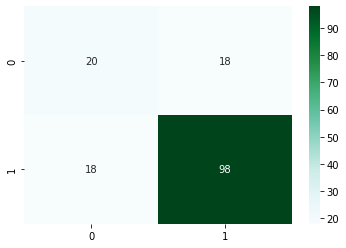

In [99]:
sns.heatmap(cm, annot=True,cmap="BuGn")